# Problem 1: Linear Regression

### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df_gem_stone = pd.read_csv("cubic_zirconia.csv")
df_gem_stone.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df_gem_stone.shape

(26967, 11)

In [4]:
print("Data has ", df_gem_stone.shape[0]," rows and  ",df_gem_stone.shape[1]," columns ")

Data has  26967  rows and   11  columns 


In [5]:
df_gem_stone.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [6]:
df_gem_stone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
#Checking Null Value
df_gem_stone.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

Table have NULL values in the "depth" field, which needs to be impoted.

In [8]:
#Checking duplicates in data
df_gem_stone_dup = df_gem_stone.duplicated()
print('Number of duplicate rows = %d' % (df_gem_stone_dup.sum()))

Number of duplicate rows = 0


In [9]:
#Finding unique values for categorical variables
for column in df_gem_stone.columns:
    if df_gem_stone[column].dtype == 'object':
        print("Field name is ", column.upper(),': and Count for this categories are ',df_gem_stone[column].nunique())
        print(df_gem_stone[column].value_counts().sort_values())
        print('\n\n')

Field name is  CUT : and Count for this categories are  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64



Field name is  COLOR : and Count for this categories are  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64



Field name is  CLARITY : and Count for this categories are  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64





### Univariate Analysis

In [10]:
## Since we dont need first field for our analysis, as it is a ID field, we will remove this field and create a separate 
#data frame for our work
df_gem_stone_new= df_gem_stone.iloc[:,1:]
df_gem_stone_new.shape

(26967, 10)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')


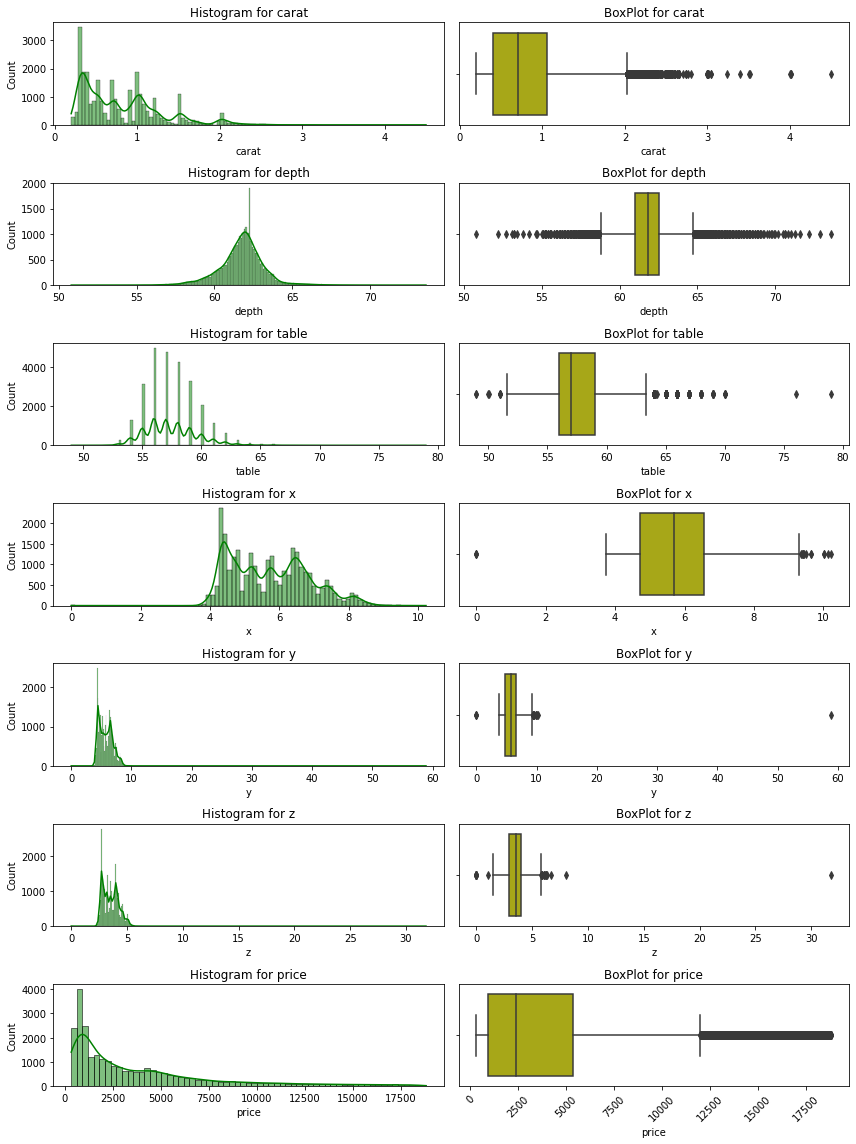

In [11]:
col_list=df_gem_stone_new.columns
print(col_list)

fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12,16)
x=0
y=0
for i in df_gem_stone_new.select_dtypes(include='number'):
        ax_hist=sns.histplot(x=df_gem_stone_new[i], kde=True, ax=axes[x][y], color='g')
        ax_box=sns.boxplot(x=df_gem_stone_new[i], data=df_gem_stone_new, ax=axes[x][y+1], color='y')
        plt.xticks(rotation=45)
        ax_hist.set(xlabel=i,title='Histogram for '+i)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

In [12]:
##Check for Skewness of the data:
df_gem_stone_new.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

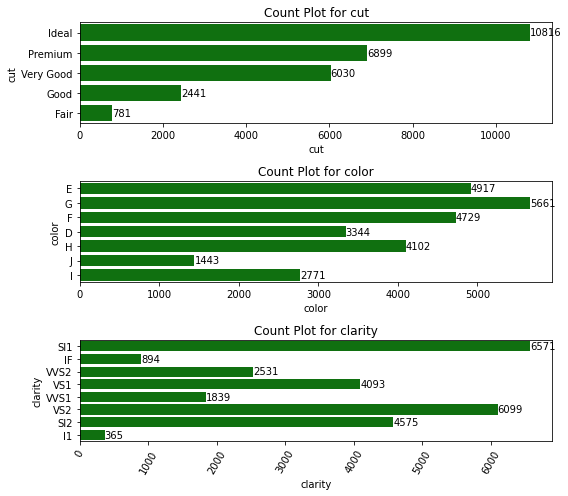

In [13]:
fig, axes = plt.subplots(nrows=3)
fig.set_size_inches(8,7)
x=0
for i in df_gem_stone_new.select_dtypes(include='object'):
    ax_count=sns.countplot(y=i, data=df_gem_stone_new,ax=axes[x], orient = 'h', color='g', ) ##color='g'
    ax_count.set(xlabel=i,title='Count Plot for '+i)
    x=x+1
    plt.xticks(rotation=60)
    plt.tight_layout()
    for container in ax_count.containers:
        ax_count.bar_label(container)

## Bivariate Analysis

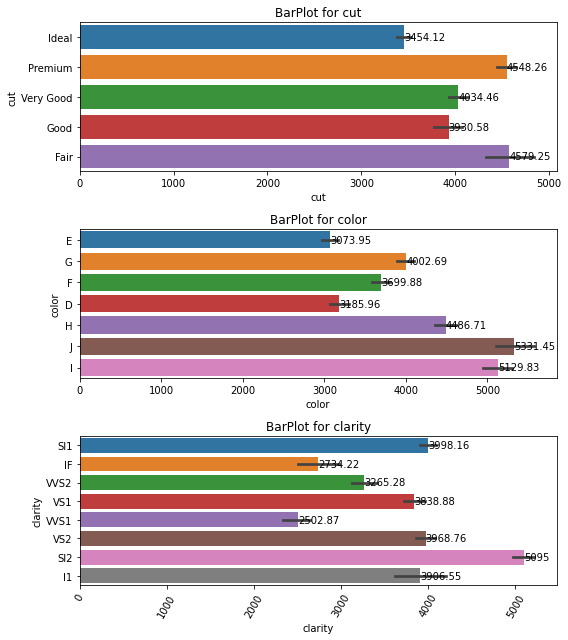

In [14]:
fig, axes = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches(8,9)
x=0
for i in df_gem_stone_new.select_dtypes(include='object'):
    ax_bar=sns.barplot(data = df_gem_stone_new, y=i,x='price', ax=axes[x] )
    ax_bar.set(xlabel=i,title='BarPlot for '+i)
    x=x+1
    plt.xticks(rotation=60)
    plt.tight_layout()
    for container in ax_bar.containers:
        ax_bar.bar_label(container)

In [15]:
for i in df_gem_stone_new.select_dtypes(include='object'):
    #print(df_gem_stone_new.groupby(i).mean('price'))
    print(df_gem_stone_new.groupby(i)['price'].mean('price').sort_values(),end='\n\n')

cut
Ideal        3454.119730
Good         3930.581729
Very Good    4034.462852
Premium      4548.263806
Fair         4579.248399
Name: price, dtype: float64

color
E    3073.946715
D    3185.961423
F    3699.880313
G    4002.694400
H    4486.713554
I    5129.830386
J    5331.453915
Name: price, dtype: float64

clarity
VVS1    2502.874388
IF      2734.222595
VVS2    3265.279336
VS1     3838.876130
I1      3906.547945
VS2     3968.759961
SI1     3998.155228
SI2     5095.000437
Name: price, dtype: float64



## Multivariate Analysis

<Figure size 720x720 with 0 Axes>

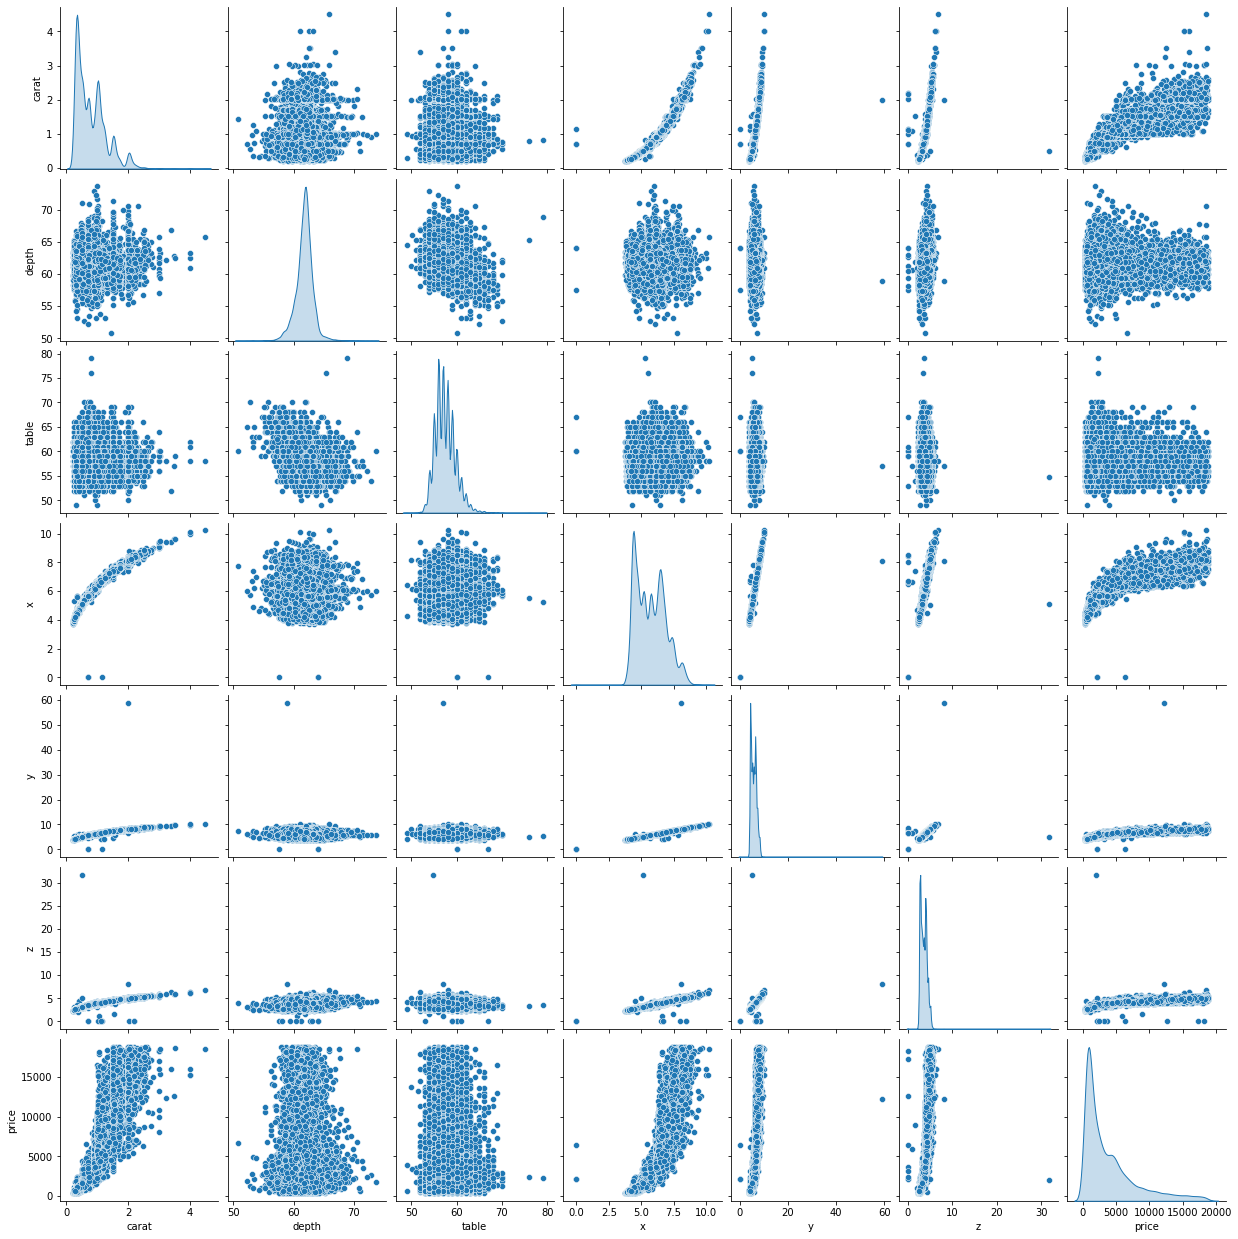

In [16]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df_gem_stone_new, diag_kind='kde');

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'carat'),
  Text(1.5, 0, 'depth'),
  Text(2.5, 0, 'table'),
  Text(3.5, 0, 'x'),
  Text(4.5, 0, 'y'),
  Text(5.5, 0, 'z'),
  Text(6.5, 0, 'price')])

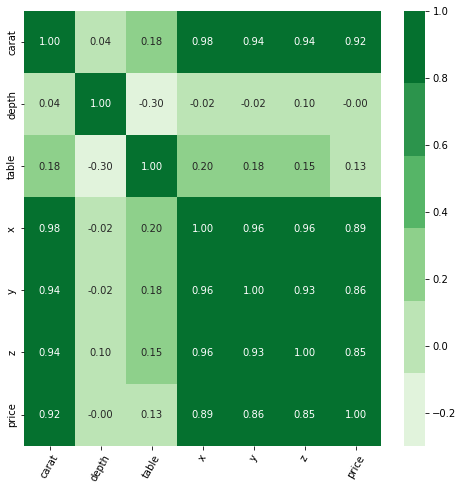

In [17]:
## Heat Map for all Numeric Fields
plt.figure(figsize=(8,8))
colormap = sns.color_palette("Greens")
sns.heatmap(df_gem_stone_new.corr(),annot=True,fmt=".2f",cmap=colormap);
plt.xticks(rotation=60)

In [18]:
df_gem_stone_new.corr().T

,carat,depth,table,x,y,z,price
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

### Null Value imputations

In [19]:
#Check for NULLs
df_gem_stone_new.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [20]:
for column in df_gem_stone_new.columns:
    if df_gem_stone_new[column].dtype != 'object':
        median = df_gem_stone_new[column].median()
        df_gem_stone_new[column] = df_gem_stone_new[column].fillna(median)    

In [21]:
df_gem_stone_new.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [22]:
df_gem_stone_new.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26967.0,61.746564,1.394509,50.8,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


### Check for unexpected values using describe and Impute them

In [23]:
## Check for which rows have Any value as 0 for X, Y or Z column

df_gem_stone_new[(df_gem_stone_new['x']==0) | (df_gem_stone_new['y']==0) | (df_gem_stone_new['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


### We need to impute them with Median of the data for x,y and z field Since we have roughly 27 thousands of rows and , probalem is with 9 rows of data, we can delete these rows with Zero dimension and it will not affect our analysis.

In [24]:
#deleting the rows with Zero values in X, Y or Z columns
df_gem_stone_new.drop(df_gem_stone_new[(df_gem_stone_new['x']==0) | (df_gem_stone_new['y']==0) | (df_gem_stone_new['z']==0)].index, inplace=True)

In [25]:
## Check the shape of the data after deletion 
df_gem_stone_new.shape

(26958, 10)

In [26]:
## once again Check for which rows have Any value as 0 for X, Y or Z column

df_gem_stone_new[(df_gem_stone_new['x']==0) | (df_gem_stone_new['y']==0) | (df_gem_stone_new['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


### Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [27]:
#Finding unique values for categorical variables
for column in df_gem_stone_new.select_dtypes(include='object'):
    print("Field name is ", column.upper(),': and Count for this categories are ',df_gem_stone[column].nunique())
    print("Field name is ", column.upper(),': and it\'s distinct  categories are ',df_gem_stone[column].unique(), end='\n')
    print('Counts are : \n',df_gem_stone[column].value_counts().sort_values(),end='\n\n')
    print('Mean Price for Column is: ',df_gem_stone_new.groupby(column)['price'].mean('price').sort_values(),end='\n\n')
    print('Total Price for Column is: ',df_gem_stone_new.groupby(column)['price'].sum('price').sort_values(),end='\n\n')
    print('\n\n')
        


Field name is  CUT : and Count for this categories are  5
Field name is  CUT : and it's distinct  categories are  ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Counts are : 
 Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64

Mean Price for Column is:  cut
Ideal        3454.119730
Good         3932.058221
Very Good    4034.462852
Premium      4543.902945
Fair         4576.938462
Name: price, dtype: float64

Total Price for Column is:  cut
Fair          3570012
Good          9590290
Very Good    24327811
Premium      31321123
Ideal        37359759
Name: price, dtype: int64




Field name is  COLOR : and Count for this categories are  7
Field name is  COLOR : and it's distinct  categories are  ['E' 'G' 'F' 'D' 'H' 'J' 'I']
Counts are : 
 J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64

Mean Price for Column is:  color
E    3073.946715
D    3185.961423
F    3700.544531
G   

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

### Data Encoding:

In [28]:
# Performed One Hot encoding for string data type variable to get dummies
df_stone = pd.get_dummies(df_gem_stone_new, columns=['cut','color','clarity'],drop_first=True)
df_stone.head(10)

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,1.02,61.5,56.0,6.46,6.49,3.99,9502,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,1.01,63.7,60.0,6.35,6.30,4.03,4836,1,0,0,...,1,0,0,0,1,0,0,0,0,0
7,0.50,61.5,62.0,5.09,5.06,3.12,1415,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,1.21,63.8,64.0,6.72,6.63,4.26,5407,1,0,0,...,1,0,0,0,1,0,0,0,0,0
9,0.35,60.5,57.0,4.52,4.60,2.76,706,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
## Actual data snippet
df_gem_stone_new.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [30]:
## new List of Columns:
df_stone.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

### Data Split: Split the data into train and test (70:30)

In [31]:
X = df_stone.drop('price', axis=1)
y = df_stone[['price']]

In [32]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
y.head()

,price
0,499
1,984
2,6289
3,1082
4,779


In [34]:
#Train and test split of X and y in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [35]:
X_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
7598,0.71,63.3,59.0,5.52,5.61,3.52,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8882,0.30,62.9,58.0,4.27,4.31,2.70,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
22763,0.70,63.9,59.0,5.64,5.60,3.59,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6643,0.36,60.2,56.0,4.65,4.62,2.79,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
18701,1.66,63.0,57.0,7.45,7.50,4.71,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [36]:
print('Shape for X_train is ',X_train.shape)
print('Shape for X_test is ',X_test.shape)
print('Shape for y_train is ',y_train.shape)
print('Shape for y_test is ',y_test.shape)

Shape for X_train is  (18870, 23)
Shape for X_test is  (8088, 23)
Shape for y_train is  (18870, 1)
Shape for y_test is  (8088, 1)


### Perform checks for significant variables using appropriate method from statsmodel

In [37]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [38]:
# As further deep dive, explore coefficients for each of the independent attributes
for id, col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, regression_model.coef_[0][id]))

The coefficient for carat is 11517.996144917692
The coefficient for depth is -78.37892518459674
The coefficient for table is -27.28079950140201
The coefficient for x is -1110.5050444238598
The coefficient for y is -3.0125926448481954
The coefficient for z is -53.01784010141104
The coefficient for cut_Good is 528.5117113353848
The coefficient for cut_Ideal is 780.7217832211218
The coefficient for cut_Premium is 682.0924594468256
The coefficient for cut_Very Good is 658.8171275357819
The coefficient for color_E is -184.3868393621886
The coefficient for color_F is -258.42171853152684
The coefficient for color_G is -439.9189640097478
The coefficient for color_H is -954.9281223316277
The coefficient for color_I is -1453.3190106074037
The coefficient for color_J is -2348.870895182772
The coefficient for clarity_IF is 5189.825126038003
The coefficient for clarity_SI1 is 3578.827930896075
The coefficient for clarity_SI2 is 2593.4919399564665
The coefficient for clarity_VS1 is 4473.322378221884

In [39]:
##Equation according to Learning regression First Model 
for id, col in enumerate(X_train.columns):
    print("{} * {}".format(col, regression_model.coef_[0][id]), end=' + ')
print(regression_model.intercept_[0])

carat * 11517.996144917692 + depth * -78.37892518459674 + table * -27.28079950140201 + x * -1110.5050444238598 + y * -3.0125926448481954 + z * -53.01784010141104 + cut_Good * 528.5117113353848 + cut_Ideal * 780.7217832211218 + cut_Premium * 682.0924594468256 + cut_Very Good * 658.8171275357819 + color_E * -184.3868393621886 + color_F * -258.42171853152684 + color_G * -439.9189640097478 + color_H * -954.9281223316277 + color_I * -1453.3190106074037 + color_J * -2348.870895182772 + clarity_IF * 5189.825126038003 + clarity_SI1 * 3578.827930896075 + clarity_SI2 * 2593.4919399564665 + clarity_VS1 * 4473.322378221884 + clarity_VS2 * 4177.793380430826 + clarity_VVS1 * 4888.899199388179 + clarity_VVS2 * 4818.749298764061 + 3733.836761483998


In [40]:
# Checking the intercept for the model
intercept = regression_model.intercept_[0]
print("The intercept for the model is {}".format(intercept))

print("Intercept is the point on Y Axis , when all values of X are Zero. basically when we say, what should be the value of Y when all params are Zero ")

The intercept for the model is 3733.836761483998
Intercept is the point on Y Axis , when all values of X are Zero. basically when we say, what should be the value of Y when all params are Zero 


In [41]:
# R square for training data
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.9232445774547248


In [42]:
# R square for test data
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.9171155258688372


In [43]:
#RMSE for Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(metrics.mean_squared_error(y_train,predicted_train)))

The Root Mean Square Error (RMSE) of the model is for testing set is 1104.3132024549977


In [44]:
#RMSE for Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))

The Root Mean Square Error (RMSE) of the model is for testing set is 1182.816860580418


1182.8168605804165


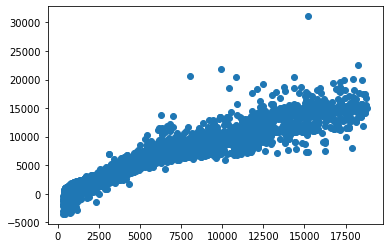

In [45]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
import math
print(math.sqrt(mse))
#mpg prediction
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

In [46]:
# Finding variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [48]:
i=0
for column in X.columns:
    if i < len(X.columns):
        print ('VIF for ',column ,"-->",  vif[i])
        i = i+1

VIF for  carat --> 84.58907110464223
VIF for  depth --> 635.0785575607041
VIF for  table --> 641.2801249027281
VIF for  x --> 1148.2046081426256
VIF for  y --> 350.5712938957685
VIF for  z --> 387.7811881611851
VIF for  cut_Good --> 4.152190501890034
VIF for  cut_Ideal --> 15.38926117702906
VIF for  cut_Premium --> 10.004885153216868
VIF for  cut_Very Good --> 8.819240896249328
VIF for  color_E --> 2.479757527875468
VIF for  color_F --> 2.44812564775115
VIF for  color_G --> 2.7961451211719908
VIF for  color_H --> 2.3024312163212453
VIF for  color_I --> 1.932002362163944
VIF for  color_J --> 1.5181885339909045
VIF for  clarity_IF --> 3.6091160818896486
VIF for  clarity_SI1 --> 19.596687315121358
VIF for  clarity_SI2 --> 13.75089353832038
VIF for  clarity_VS1 --> 12.65109387349331
VIF for  clarity_VS2 --> 18.316281401325995
VIF for  clarity_VVS1 --> 6.342353221591863
VIF for  clarity_VVS2 --> 8.277778990831585


In [49]:
#Finding the concatenation
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,0.71,63.3,59.0,5.52,5.61,3.52,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2768
8882,0.30,62.9,58.0,4.27,4.31,2.70,0,0,0,1,...,0,0,0,0,0,0,1,0,0,544
22763,0.70,63.9,59.0,5.64,5.60,3.59,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2351
6643,0.36,60.2,56.0,4.65,4.62,2.79,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1080
18701,1.66,63.0,57.0,7.45,7.50,4.71,0,0,0,1,...,1,0,0,1,0,0,0,0,0,8901


In [50]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [51]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept        6494.879500
carat           11550.769838
depth            -102.356651
table             -39.712171
x               -1136.498078
y                   3.611963
z                 -48.854023
cut_Good          -42.749019
cut_Ideal         157.280402
cut_Premium        86.290297
color_E          -183.081673
color_F          -262.836610
color_G          -441.186849
color_H          -957.295121
color_I         -1453.153306
color_J         -2350.688643
clarity_IF       5294.219235
clarity_SI1      3691.357577
clarity_SI2      2695.725073
clarity_VS1      4580.732005
clarity_VS2      4287.449438
clarity_VVS1     5000.480398
clarity_VVS2     4929.683290
dtype: float64

In [52]:
#Getting Inferential statistical data
print(lm1.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.022e+04
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:41:53   Log-Likelihood:            -1.5907e+05
No. Observations:               18870   AIC:                         3.182e+05
Df Residuals:                   18847   BIC:                         3.184e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6494.8795    640.480     10.141   

### Try with new list of columns based on above analysis , remove Y, Z and cut_Good from the indepndent fields because their P value are greater than 0.05 according to above model

In [53]:
lm2 = smf.ols(formula= 'price ~ carat  + depth + table  + x + cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm2.params

Intercept        6748.110987
carat           11552.807031
depth            -106.052721
table             -40.291318
x               -1163.607035
cut_Ideal         167.136688
cut_Premium        97.924032
color_E          -183.495463
color_F          -262.972032
color_G          -440.817616
color_H          -956.895283
color_I         -1452.785133
color_J         -2350.803951
clarity_IF       5293.346980
clarity_SI1      3689.963996
clarity_SI2      2694.075709
clarity_VS1      4579.200005
clarity_VS2      4286.666335
clarity_VVS1     4999.796063
clarity_VVS2     4929.640324
dtype: float64

In [54]:
print(lm2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.183e+04
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:41:53   Log-Likelihood:            -1.5907e+05
No. Observations:               18870   AIC:                         3.182e+05
Df Residuals:                   18850   BIC:                         3.183e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6748.1110    623.750     10.819   

In [55]:
#Concatenation of X and y into one DF
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,0.71,63.3,59.0,5.52,5.61,3.52,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2768
8882,0.30,62.9,58.0,4.27,4.31,2.70,0,0,0,1,...,0,0,0,0,0,0,1,0,0,544
22763,0.70,63.9,59.0,5.64,5.60,3.59,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2351
6643,0.36,60.2,56.0,4.65,4.62,2.79,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1080
18701,1.66,63.0,57.0,7.45,7.50,4.71,0,0,0,1,...,1,0,0,1,0,0,0,0,0,8901


In [56]:
# Calculation of MSE
mse = np.mean((lm2.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse


1229287.1550797261

In [57]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(6748.11) * Intercept + (11552.81) * carat + (-106.05) * depth + (-40.29) * table + (-1163.61) * x + (167.14) * cut_Ideal + (97.92) * cut_Premium + (-183.5) * color_E + (-262.97) * color_F + (-440.82) * color_G + (-956.9) * color_H + (-1452.79) * color_I + (-2350.8) * color_J + (5293.35) * clarity_IF + (3689.96) * clarity_SI1 + (2694.08) * clarity_SI2 + (4579.2) * clarity_VS1 + (4286.67) * clarity_VS2 + (4999.8) * clarity_VVS1 + (4929.64) * clarity_VVS2 + 

### Compare these models and select the best one with appropriate reasoning.

## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

**Overview:**

According to business study given, we are supposed to help the "Gem Stones co ltd" to predict the price for the cubic zirconia and apprehension on the different price ranges. We have been given the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. 

We have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. 
Also, provide them with the best 5 attributes that are most important.

**Business insights:**
- Cut have 5 different categories, of  ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']

- While finding the unique categorical value during the exploratory data analysis it was observed that the "ideal" cut had given best sell to the company with more than total price of "37,359,759" (37 Million) and Count of "Ideal"   Stones of 10816.

- Least Sell came from "Fair" Stones and it also have least number of Stones of 781.

- In terms of the colors, G and H, are giving best Sell, whereas maximum Stones also came from Color G 

- Very less Stones from Color I, Sell for color J Stones with least total Price but at the same time, J has the Costliest Stone among all with Mean price of  5331.45.

- Similarly, the clarity levels SI2, VS2, SI1 were the most profitable among all. And  SI2 turned out to be the costliest in terms of price. and VVS1 is the cheapest Stone of price of 2502.87.

- There is very Strong co-relation between X,Y and Z with price, or we can say all are related to each other. which seems True as well, as X, Y and Z are denoting to the Dimension of the Stone. So the Bigger the Stone is, Precius it will be and Costly it will be.

- Equation For the prediction of the Prices based on Parameters determined is as follows :

(6748.11) * Intercept + (11552.81) * carat + (-106.05) * depth + (-40.29) * table + (-1163.61) * x + (167.14) * cut_Ideal + (97.92) * cut_Premium + (-183.5) * color_E + (-262.97) * color_F + (-440.82) * color_G + (-956.9) * color_H + (-1452.79) * color_I + (-2350.8) * color_J + (5293.35) * clarity_IF + (3689.96) * clarity_SI1 + (2694.08) * clarity_SI2 + (4579.2) * clarity_VS1 + (4286.67) * clarity_VS2 + (4999.8) * clarity_VVS1 + (4929.64) * clarity_VVS2 + 

Total number of Observationsused in the data set is  18870   
Df Model:                          19 , which means, 19 fields were used for the model predictions.


**Business Recommendations:**

- In terms of Cut, the customer preference and sale goes with ideal, premium, and very good cuts. Hence, these highly selling products will be the prime focus in the marketing campaigns.

- The marketing ads can be broadcasted by focusing on the cut perfection, customer acceptance, quality, and pricing.

- Talking about the best 5 attributes that are most important: Cut, Carat, X (Lenth of the stone), clarity are most important attributes of the data to predict the price. as well as same should be used as Focused point for the sell of the Stones.

# Problem 2: Logistic Regression and LDA


## You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [58]:
df_TnT = pd.read_csv("Holiday_Package.csv")
df_TnT.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [59]:
df_TnT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [60]:
df_TnT.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


In [61]:
## Check for Duplicates:
df_TnT.duplicated().sum()


0

In [62]:
## Check for NULL Values

df_TnT.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [63]:
#Finding unique values for categorical variables
for column in df_TnT.columns:
    if df_TnT[column].dtype == 'object':
        print("Field name is ", column.upper(),': and Count for this categories are ',df_TnT[column].nunique())
        print(df_TnT[column].value_counts().sort_values())
        print('\n\n')

Field name is  HOLLIDAY_PACKAGE : and Count for this categories are  2
yes    401
no     471
Name: Holliday_Package, dtype: int64



Field name is  FOREIGN : and Count for this categories are  2
yes    216
no     656
Name: foreign, dtype: int64





# Univariate, Bivariate and Multivariate Analysis

### Shape of the data 

In [64]:
df_TnT.drop('Unnamed: 0',axis=1,inplace=True)

In [65]:
df_TnT.shape

(872, 7)

### Histogram and Box Plot for Numeric data

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')


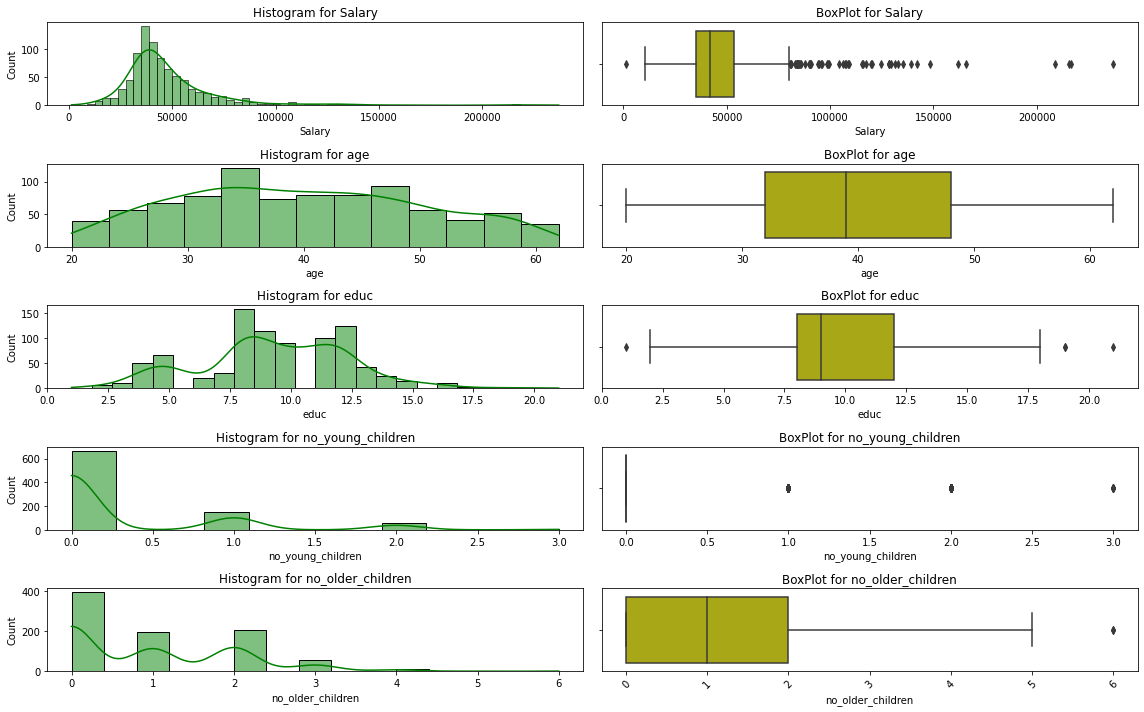

In [66]:
col_list=df_TnT.columns
print(col_list)

fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(16,10)
x=0
y=0
for i in df_TnT.select_dtypes(include='number'):
        ax_hist=sns.histplot(x=df_TnT[i], kde=True, ax=axes[x][y], color='g')
        ax_box=sns.boxplot(x=df_TnT[i], data=df_TnT, ax=axes[x][y+1], color='y')
        plt.xticks(rotation=45)
        ax_hist.set(xlabel=i,title='Histogram for '+i)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

###  Check for skewness

In [67]:
df_TnT.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

## Count Plot

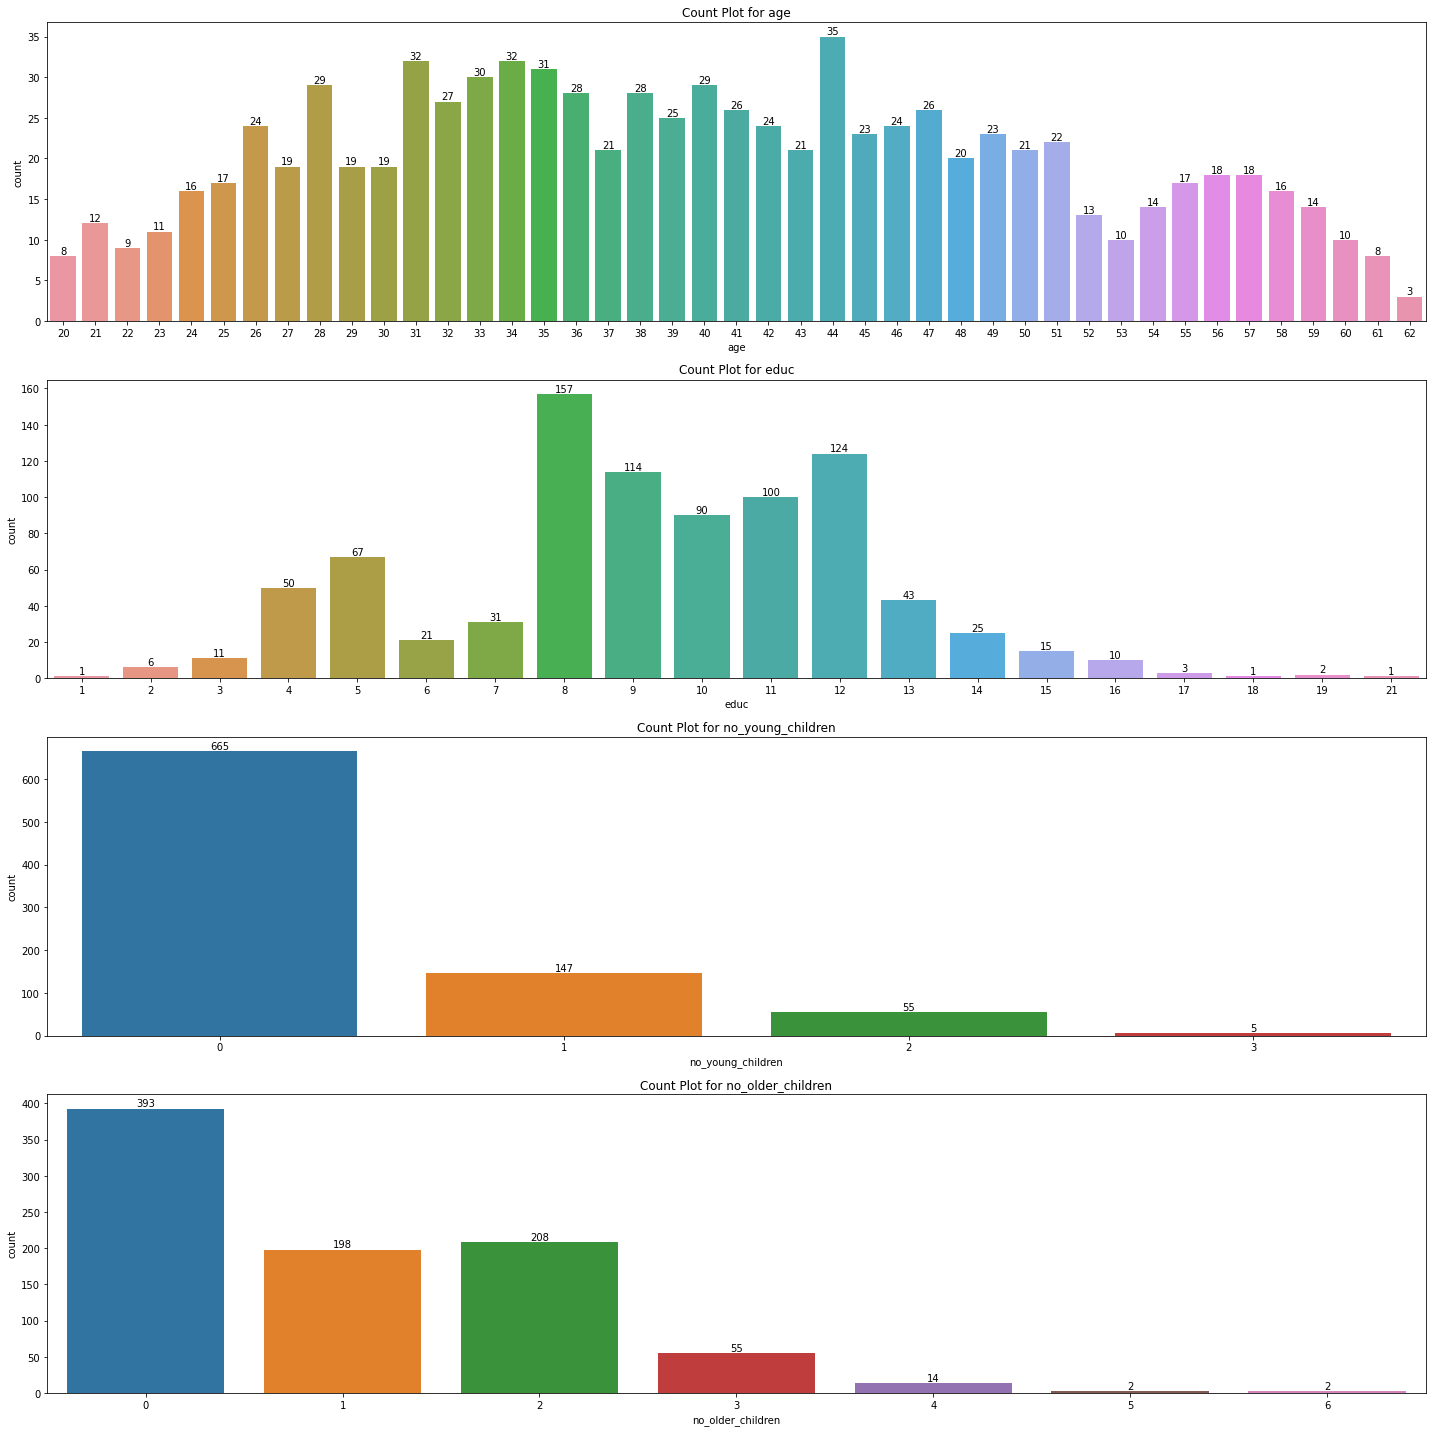

In [68]:
fig, axes = plt.subplots(nrows=4)
fig.set_size_inches(20,20)
x=0

columns=('age','educ','no_young_children','no_older_children')
for i in columns:
    ax_count=sns.countplot(x=i, data=df_TnT.sort_values(i),ax=axes[x]) ##color='g'
    ax_count.set(xlabel=i,title='Count Plot for '+i)
    x=x+1
    plt.tight_layout()
    for container in ax_count.containers:
        ax_count.bar_label(container)

## Count Plot with hue on holiday_package dependent variable

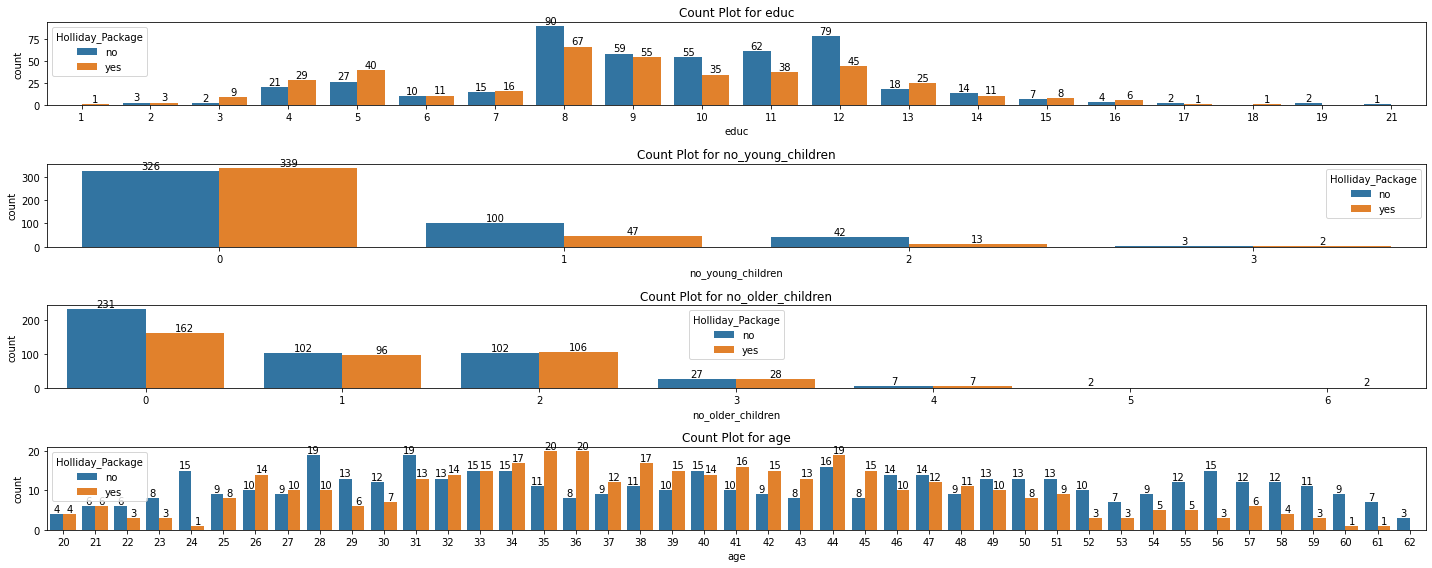

In [69]:
fig, axes = plt.subplots(nrows=4)
fig.set_size_inches(20,8)
x=0
columns=('educ','no_young_children','no_older_children','age')
for i in columns:
    ax_count=sns.countplot(x=i, hue='Holliday_Package',data=df_TnT, ax=axes[x])
    ax_count.set(xlabel=i,title='Count Plot for '+i)
    x=x+1
    plt.tight_layout()
    for container in ax_count.containers:
        ax_count.bar_label(container)

### Multivariate analysis  using Pair map

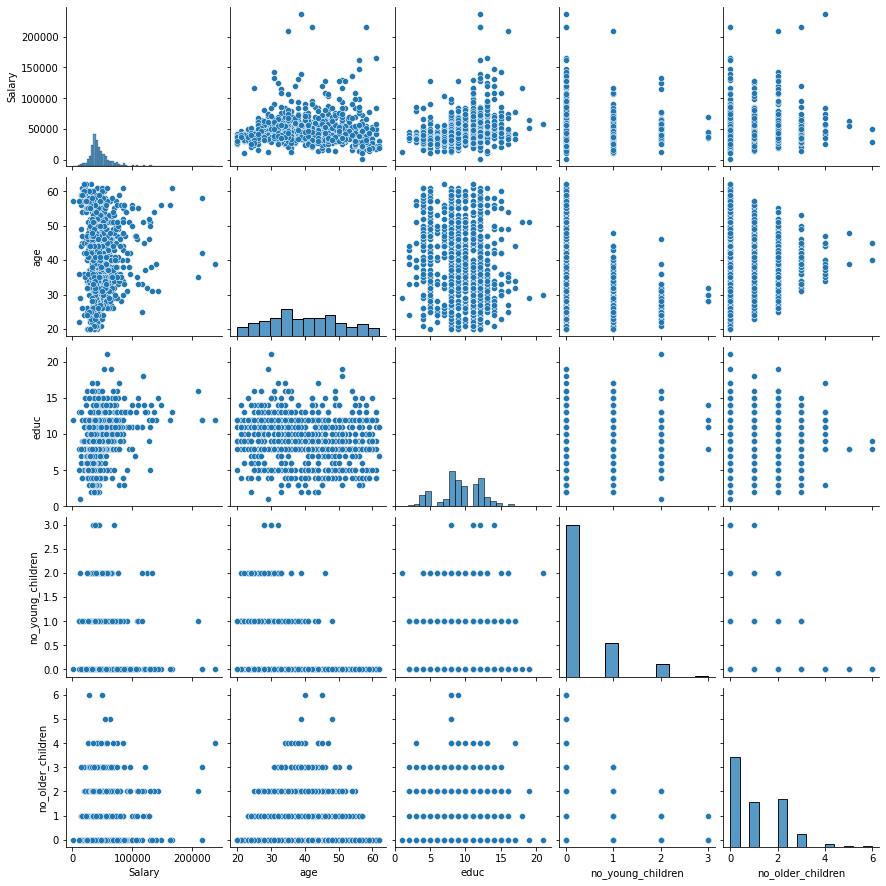

In [70]:
#the pair plot:-
sns.pairplot(data = df_TnT)
plt.show()

###  Co-relation check using Heat map

<AxesSubplot:>

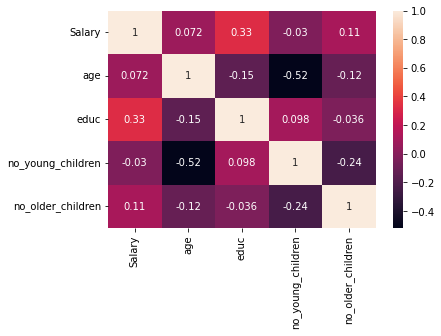

In [71]:
sns.heatmap(data=df_TnT.corr(),annot=True)

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Perform Encoding 

In [72]:
## Import label encoding
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [73]:
# encoding string data type variable to get dummies
df_TnT = pd.get_dummies(df_TnT, columns=['foreign'], drop_first=True)
df_TnT = pd.get_dummies(df_TnT, columns=['Holliday_Package'], drop_first = True)

In [74]:
df_TnT.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes,Holliday_Package_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,0,1
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [75]:
df_TnT.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign_yes,872.0,0.247706,0.431928,0.0,0.0,0.0,0.0,1.0
Holliday_Package_yes,872.0,0.459862,0.498672,0.0,0.0,0.0,1.0,1.0


In [76]:
for col in df_TnT.columns:
    print(df_TnT.value_counts(col),end='\n\n')

Salary
35341     2
33357     2
40270     2
39460     2
32197     2
         ..
37324     1
37370     1
37380     1
37418     1
236961    1
Length: 864, dtype: int64

age
44    35
31    32
34    32
35    31
33    30
40    29
28    29
38    28
36    28
32    27
47    26
41    26
39    25
46    24
26    24
42    24
45    23
49    23
51    22
50    21
37    21
43    21
48    20
29    19
30    19
27    19
56    18
57    18
25    17
55    17
24    16
58    16
54    14
59    14
52    13
21    12
23    11
53    10
60    10
22     9
61     8
20     8
62     3
dtype: int64

educ
8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
1       1
18      1
21      1
dtype: int64

no_young_children
0    665
1    147
2     55
3      5
dtype: int64

no_older_children
0    393
2    208
1    198
3     55
4     14
5      2
6      2
dtype: int64

foreign_yes
0    656
1    216
dtype: int64

Hol

### Check pair Plot for Direct analysis, if any field is showing proper separation of the classes 

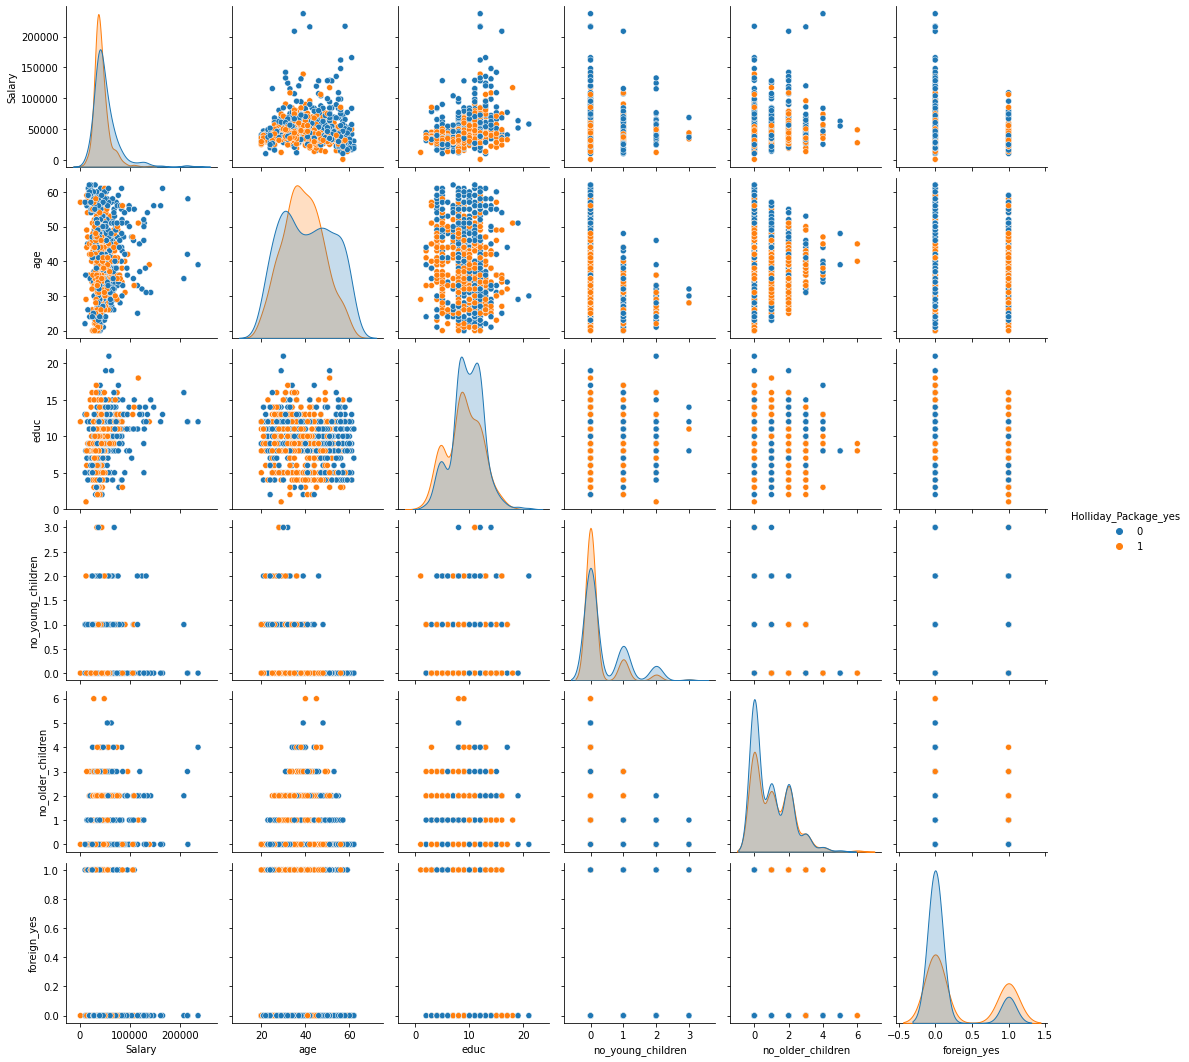

In [77]:
# pair plot to check on data distribution and co-linearity
sns.pairplot(df_TnT, hue = 'Holliday_Package_yes', diag_kind='kde')  
plt.show()

### Plot the data into train and test data set 

In [78]:
# splitting data into independent and dependent variables
X = df_TnT.drop('Holliday_Package_yes' , axis=1)
y = df_TnT.pop("Holliday_Package_yes")

In [79]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [80]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package_yes, dtype: uint8

In [81]:
y.value_counts()

0    471
1    401
Name: Holliday_Package_yes, dtype: int64

In [82]:
#splitting data into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [83]:
print('Shape for X_train is ',X_train.shape)
print('Shape for X_test is ',X_test.shape)
print('Shape for y_train is ',y_train.shape)
print('Shape for y_test is ',y_test.shape)

Shape for X_train is  (610, 6)
Shape for X_test is  (262, 6)
Shape for y_train is  (610,)
Shape for y_test is  (262,)


### Perform Logistic Regression 

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV

In [1]:
X_train.head()

NameError: name 'X_train' is not defined

In [86]:
y_train.head()

502    0
729    1
604    0
246    0
494    1
Name: Holliday_Package_yes, dtype: uint8

In [87]:
#Applying GridSearchCV
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.01,0.001]}

In [88]:
logistic_model = LogisticRegression(max_iter=100000,n_jobs=2)

In [89]:
grid_search_logit = GridSearchCV(estimator = logistic_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [90]:
grid_search_logit.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.01, 0.001]},
             scoring='f1')

In [91]:
print(grid_search_logit.best_params_,'\n')
print(grid_search_logit.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=0.001)


In [92]:
best_model_logit = grid_search_logit.best_estimator_

In [93]:
# Prediction on the training set
y_train_predict_logit = best_model_logit.predict(X_train)
y_train_predict_logit

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [94]:
# Prediction on the training set
y_test_predict_logit = best_model_logit.predict(X_test)
y_test_predict_logit

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=uint8)

In [95]:
#Probabilities on the test set
y_test_predict_logit_prob=best_model_logit.predict_proba(X_test)
pd.DataFrame(y_test_predict_logit_prob).head()

,0,1
0,0.757433,0.242567
1,0.283446,0.716554
2,0.898063,0.101937
3,0.971127,0.028873
4,0.473965,0.526035


### Perform LDA 

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [97]:
#Building a LDA Model
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train,y_train)

In [98]:
# Training data class Prediction, cut-off value = 0.5
y_predict_train_LDA = model_lda.predict(X_train)
y_predict_train_LDA

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [99]:
# Test data class Prediction, cut-off value = 0.5
y_predict_test_LDA = model_lda.predict(X_test)
y_predict_test_LDA

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=uint8)

In [100]:
# Training data probability prediction
y_pred_train_LDA_prob = model_lda.predict_proba(X_train)
y_pred_train_LDA_prob

array([[0.75548159, 0.24451841],
       [0.25526162, 0.74473838],
       [0.97073767, 0.02926233],
       ...,
       [0.70575754, 0.29424246],
       [0.78409496, 0.21590504],
       [0.82222043, 0.17777957]])

In [101]:
# Training data probability prediction
y_pred_test_LDA_prob = model_lda.predict_proba(X_test)
## sample record first 3 rows
y_pred_test_LDA_prob[:3,:]

array([[0.73631204, 0.26368796],
       [0.27789318, 0.72210682],
       [0.88724312, 0.11275688]])

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Matrics for Logistic Regression Model on testing data

Accuracy of the Logistic Regression Model is  0.6450381679389313 

Confusion Matrix 
 [[103  42]
 [ 51  66]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       145
           1       0.61      0.56      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



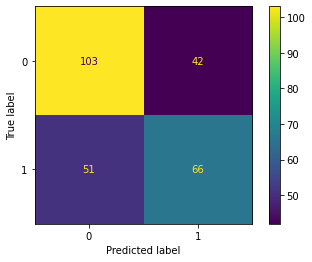

In [102]:
## Generate the Confusion Matrix and Classification Report for Test data set
print('Accuracy of the Logistic Regression Model is ',best_model_logit.score(X_test, y_test), '\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict_logit),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_test_predict_logit))
plot_confusion_matrix(best_model_logit,X_test,y_test)

AUC: 0.703


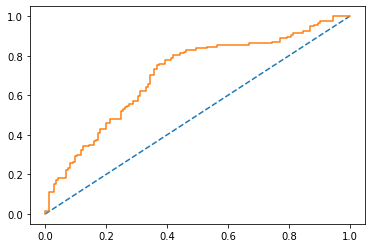

In [103]:
#AUC and ROC for the Testing data
probs = best_model_logit.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logit_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Matrics for Logistic Regression Model on Training data

Accuracy of the Logistic Regression Model is  0.6737704918032786 

Confusion Matrix 
 [[250  76]
 [123 161]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.57      0.62       284

    accuracy                           0.67       610
   macro avg       0.67      0.67      0.67       610
weighted avg       0.67      0.67      0.67       610



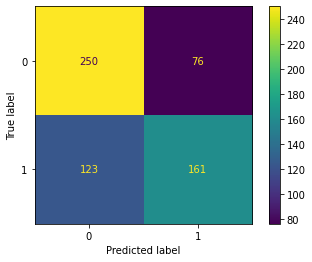

In [104]:
## Generate the Confusion Matrix and Classification Report for Test data set
print('Accuracy of the Logistic Regression Model is ',best_model_logit.score(X_train, y_train), '\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_train_predict_logit),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_train_predict_logit))
plot_confusion_matrix(best_model_logit,X_train,y_train)

AUC: 0.743


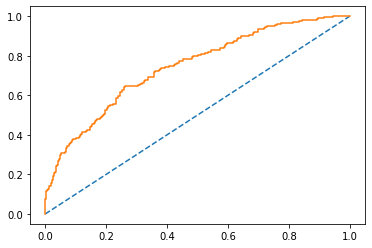

In [105]:
#AUC and ROC for the training data
probs = best_model_logit.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logit_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Matrics for LDA Model on testing data

Accuracy of the LDA Model is  0.6412213740458015 

Confusion Matrix 
 [[103  42]
 [ 52  65]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



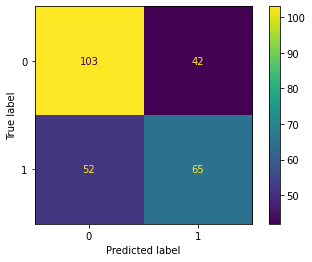

In [106]:
## Generate the Confusion Matrix and Classification Report for Test data set
print('Accuracy of the LDA Model is ',model_lda.score(X_test, y_test), '\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict_test_LDA),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict_test_LDA))
plot_confusion_matrix(model_lda,X_test,y_test)

AUC: 0.703


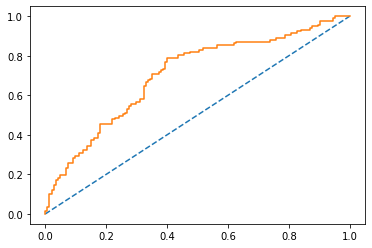

In [107]:
#AUC and ROC for the Testing data
probs = model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Matrics for LDA Model on Training data

Accuracy of the LDA Model is  0.6721311475409836 

Confusion Matrix 
 [[252  74]
 [126 158]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



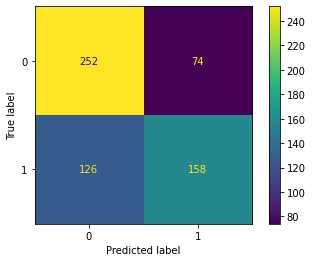

In [108]:
## Generate the Confusion Matrix and Classification Report for Test data set
print('Accuracy of the LDA Model is ',model_lda.score(X_train, y_train), '\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_predict_train_LDA),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_predict_train_LDA))
plot_confusion_matrix(model_lda,X_train,y_train)

AUC: 0.742


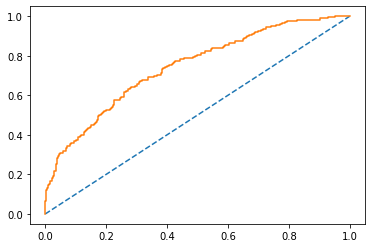

In [109]:
#AUC and ROC for the training data
probs = model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Generate Precision, Recall and F1 Score for all Model for both train and Test data set

In [110]:
logit_metrics=classification_report(y_train, y_train_predict_logit,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_train_f1=round(df.loc["1"][2],2)
logit_train_recall=round(df.loc["1"][1],2)
logit_train_precision=round(df.loc["1"][0],2)
logit_train_acc=best_model_logit.score(X_train, y_train)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print('logit_train_acc ',logit_train_acc)
print ('logit_train_f1 ',logit_train_f1,'\n')

logit_metrics=classification_report(y_test, y_test_predict_logit,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_test_f1=round(df.loc["1"][2],2)
logit_test_recall=round(df.loc["1"][1],2)
logit_test_precision=round(df.loc["1"][0],2)
logit_test_acc=best_model_logit.score(X_test, y_test)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print('logit_test_acc ',logit_test_acc)
print ('logit_test_f1 ',logit_test_f1,'\n')

lda_metrics=classification_report(y_train, y_predict_train_LDA,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
lda_train_acc=model_lda.score(X_train, y_train)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print('lda_train_acc ',lda_train_acc)
print ('lda_train_f1 ',logit_train_f1,'\n')

lda_metrics=classification_report(y_test, y_predict_test_LDA,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_acc=model_lda.score(X_test, y_test)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print('lda_test_acc ',lda_test_acc)
print ('lda_test_f1 ',lda_test_f1)

logit_train_precision  0.68
logit_train_recall  0.57
logit_train_acc  0.6737704918032786
logit_train_f1  0.62 

logit_test_precision  0.61
logit_test_recall  0.56
logit_test_acc  0.6450381679389313
logit_test_f1  0.59 

lda_train_precision  0.68
lda_train_recall  0.56
lda_train_acc  0.6721311475409836
lda_train_f1  0.62 

lda_test_precision  0.61
lda_test_recall  0.56
lda_test_acc  0.6412213740458015
lda_test_f1  0.58


### Comparison  of the Models

In [111]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[logit_train_acc,logit_train_auc,logit_train_recall,logit_train_precision,logit_train_f1],
        'LR Test':[logit_test_acc,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.67,0.65,0.67,0.64
AUC,0.74,0.70,0.74,0.70
Recall,0.57,0.56,0.56,0.56
Precision,0.68,0.61,0.68,0.61
F1 Score,0.62,0.59,0.61,0.58


## 2.4 Inference: Basis on these predictions, what are the insights and recommendations.